In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)

x_train = x_train.reshape(len(x_train), 28*28) / 255.0  
x_test = x_test.reshape(len(x_test), 28*28) / 255.0

print(x_train.shape)
print(x_test.shape)

# because we have work on [0-9]
num_neurons = 10 
# small number for weights
weights = np.random.randn(28*28, num_neurons) * 0.01

# initialize bias to 0
bias = np.zeros(num_neurons) 

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [20]:

def hebbian_learning(x, y, weights, bias, ):
   
    target = np.zeros(num_neurons)
    target[y] = 1

    # I can also write without outerr function,,i used another way of update weights in single layer perecptron and adaline way,,,
    weights +=  np.outer(x, target)  
    bias +=  target
    return weights , bias


In [41]:
 # Train the network using the Hebbian learning rule that i defind above
def train_hebbs_nn(x_train, y_train, weights, bias):
    for i in range(len(x_train)):
            x = x_train[i]
            y = y_train[i]
            weights, bias = hebbian_learning(x, y, weights, bias)
    print("finished training")
    
    return weights , bias
    

In [42]:
# this is Test function and accuracy
def test_hebbs_nn(x_test, y_test, weights , bias):
    correct = 0
    predictions = []
   
    for i in range(len(x_test)): 
        x = x_test[i]
        
        output = np.dot(x, weights) + bias
        
        # so after the this .dot function of x and weights,,we need to  Find the neuron with the maximum output
        # np.argmax(output): This function returns the index of the maximum value in the output array. The index corresponds to the "most activated" neuron, which can be thought of as the predicted class (digit) in this case.
        # For example, if the output is [0.5, 2.0, 0.3, 0.1, ...], np.argmax(output) would return 1 (indicating that the neuron corresponding to label 1 has the highest activation).
        predicted_label = np.argmax(output)
        predictions.append((predicted_label, y_test[i], x_test[i]))
        correct += (predicted_label == y_test[i])
    
    accuracy = correct / len(x_test) * 100
    return predictions, accuracy


In [43]:

# i got this plot from chatGPT
def plot_results(predictions):
    
    plt.figure(figsize=(12, 6))
    
    for i in range(6):  # Display first 6 test images
        predicted_label, true_label, image = predictions[i]
        plt.subplot(1, 6, i + 1)
        plt.imshow(image.reshape(28, 28))
        plt.title(f'Predicted Label: {predicted_label}\nTrue Label: {true_label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()


In [44]:
#  Run the training
weights, bias = train_hebbs_nn(x_train, y_train, weights, bias)


finished training


In [45]:
#  Test the trained model and get predictions
predictions, test_accuracy = test_hebbs_nn(x_test, y_test, weights, bias)
print(f'Test Accuracy: {test_accuracy:.2f}%')


Test Accuracy: 68.08%


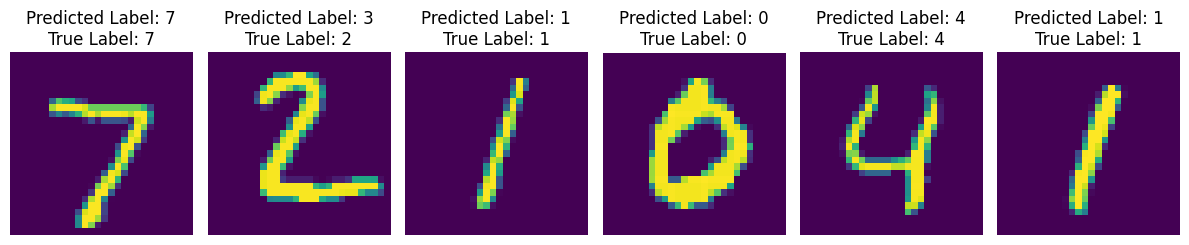

In [40]:
plot_results(predictions)